In [2]:
# prompt: 마운트

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import datetime
import nltk
import pandas as pd
import numpy as np
##import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
#주가데이터 가져오기

#모델 라이브러리
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
import xgboost as xgb
from sklearn.svm import SVC

#모델저장 라이브러리
import pickle
import os

In [124]:
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/kdt/team_por2/전처리및 모델링/전처리/2상승률추가_재민_0620_v3.xlsx')

In [125]:
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,index,매출액,영업이익,영업이익(발표기준),당기순이익,지배주주순이익,비지배주주순이익,...,영업수익,years,년도,회사명,지속가능경영 보고서공시여부,종합등급,매출액_상승률(퍼센트),영업이익_상승률,배당수익률_상승률,영업이익률_상승률
0,0,0,0,2019-12-01,3072.0,96,96,91,91,0.0,...,NaN,2019,2020.0,동화약품,0.0,B,0.000000,-93,0.00,0.000000
1,708,1,1,2020-12-01,2721.0,232,232,287,285,2.0,...,NaN,2020,2021.0,동화약품,0.0,B,-11.425781,136,-0.52,5.401277
2,1425,2,2,2021-12-01,2930.0,225,225,196,179,17.0,...,NaN,2021,2022.0,동화약품,0.0,C,7.681000,-7,0.31,-0.847096
3,2147,3,3,2022-12-01,3404.0,299,299,216,204,12.0,...,NaN,2022,2023.0,동화약품,0.0,C,16.177474,74,0.71,1.104603
4,3066,4,4,2023-12-01,3611.0,188,188,282,274,8.0,...,NaN,2023,NaN,NaN,NaN,NaN,6.081081,-111,-0.19,-3.577470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,3980,7364,7364,2023-12-01,19785.0,5518,5518,4250,4251,-1.0,...,NaN,2023,NaN,NaN,NaN,NaN,9.375864,269,0.80,-1.127820
3979,3064,7371,7371,2022-12-01,2182.0,414,414,324,324,NaN,...,NaN,2022,2023.0,에코프로에이치엔,0.0,B,0.000000,-93,0.00,0.000000
3980,3981,7372,7372,2023-12-01,2289.0,418,418,335,335,NaN,...,NaN,2023,NaN,NaN,NaN,NaN,4.903758,4,-0.45,-0.712169
3981,3065,7379,7379,2022-12-01,2369.0,1589,1589,1701,1701,NaN,...,NaN,2022,2023.0,LX홀딩스,0.0,B+,0.000000,-93,0.00,0.000000


                   매출액      영업이익     당기순이익      부채비율    지배주주지분       유보율  \
매출액           1.000000  0.726281  0.697080  0.025173  0.882128  0.282551   
영업이익          0.726281  1.000000  0.942946 -0.025271  0.767017  0.171868   
당기순이익         0.697080  0.942946  1.000000 -0.038467  0.797428  0.195486   
부채비율          0.025173 -0.025271 -0.038467  1.000000 -0.020314 -0.072077   
지배주주지분        0.882128  0.767017  0.797428 -0.020314  1.000000  0.213190   
유보율           0.282551  0.171868  0.195486 -0.072077  0.213190  1.000000   
배당수익률         0.084921  0.080339  0.071508 -0.112934  0.050582  0.057747   
ROA           0.048032  0.092811  0.122819 -0.209132  0.048437  0.121885   
ROE           0.018946  0.022483  0.027629 -0.095641  0.014613  0.035432   
매출액_상승률(퍼센트) -0.001226  0.000609  0.002569 -0.004485 -0.001612  0.000765   
영업이익_상승률     -0.042429  0.314689  0.171281  0.009194 -0.169110 -0.006258   
배당수익률_상승률     0.000392  0.025955  0.027392 -0.010940 -0.000061  0.012215   
영업이익률_상승률   

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seabor

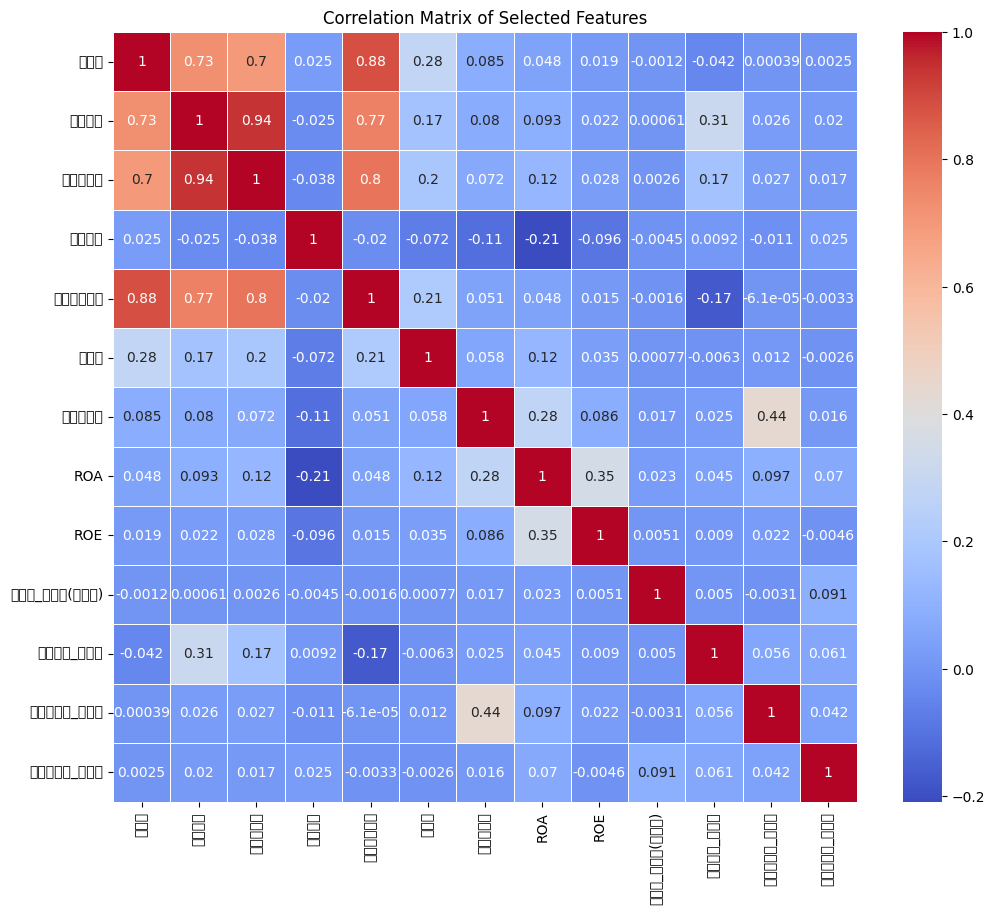

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
columns_to_analyze = ['매출액', '영업이익', '당기순이익', '부채비율', '지배주주지분', '유보율', '배당수익률',
                      'ROA', 'ROE', '매출액_상승률(퍼센트)', '영업이익_상승률', '배당수익률_상승률', '영업이익률_상승률']

# 해당 열들만 추출
df_subset = df[columns_to_analyze]

# 상관계수 행렬 계산
correlation_matrix = df_subset.corr()

# 상관계수 행렬 출력
print(correlation_matrix)

# 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Selected Features')
plt.show()

In [127]:
split_date = pd.to_datetime('2023-06-01')
df = df[df['index'] < split_date]
df_y_pred = df[df['index'] >= split_date]
#매출액_상승률(퍼센트)	영업이익_상승률	배당수익률_상승률	영업이익률_상승률

In [128]:
selected_columns = ['stock_code','회사명','index','매출액', '영업이익', '당기순이익', '부채비율','지배주주지분','유보율','배당수익률','ROA','ROE','종합등급','매출액_상승률(퍼센트)','영업이익_상승률','배당수익률_상승률','영업이익률_상승률']
df = df[selected_columns]

In [129]:
df.isnull().sum()

stock_code      0
회사명             0
index           0
매출액             3
영업이익            0
당기순이익           0
부채비율            0
지배주주지분          0
유보율             0
배당수익률           0
ROA             1
ROE             1
종합등급            0
매출액_상승률(퍼센트)    0
영업이익_상승률        0
배당수익률_상승률       0
영업이익률_상승률       0
dtype: int64

In [130]:
df = df.dropna(subset=[ '매출액','영업이익','당기순이익','지배주주지분','ROA','ROE','유보율','종합등급'])


In [131]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# 수치형 컬럼 선택
numeric_cols = ['영업이익','매출액', '당기순이익','지배주주지분','ROA','ROE','매출액_상승률(퍼센트)']

# 스케일링 적용
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

<ipython-input-131-ed5f97ef16a3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [132]:
df

,stock_code,회사명,index,매출액,영업이익,당기순이익,부채비율,지배주주지분,유보율,배당수익률,ROA,ROE,종합등급,매출액_상승률(퍼센트),영업이익_상승률,배당수익률_상승률,영업이익률_상승률
0,20,동화약품,2019-12-01,0.001009,0.387533,0.305160,25.57,0.000944,982.04,1.44,0.616479,0.952249,B,0.002422,-93,0.00,0.000000
1,20,동화약품,2020-12-01,0.000893,0.387694,0.305405,26.59,0.001036,1094.99,0.92,0.634697,0.954146,B,0.002139,136,-0.52,5.401277
2,20,동화약품,2021-12-01,0.000962,0.387686,0.305291,24.34,0.001081,1149.13,1.23,0.624314,0.952952,C,0.002613,-7,0.31,-0.847096
3,20,동화약품,2022-12-01,0.001119,0.387774,0.305316,21.78,0.001132,1211.66,1.94,0.625529,0.953098,C,0.002823,74,0.71,1.104603
5,40,KR모터스,2019-12-01,0.000431,0.387126,0.304535,309.21,0.000130,-86.23,0.00,0.499373,0.915395,C,0.002422,-93,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3973,378850,화승알앤에이,2022-12-01,0.002170,0.387603,0.305205,356.04,0.000345,875.93,1.39,0.618829,0.956304,B,0.002422,-93,0.00,0.000000
3975,381970,케이카,2022-12-01,0.007197,0.388012,0.305426,117.38,0.000788,922.41,6.58,0.628859,0.954973,B,0.002422,-93,0.00,0.000000
3977,383220,F&F,2022-12-01,0.005978,0.393646,0.310575,66.48,0.002746,24454.10,1.11,0.734877,0.970416,B+,0.002422,-93,0.00,0.000000
3979,383310,에코프로에이치엔,2022-12-01,0.000715,0.387910,0.305451,112.85,0.000327,1076.96,1.32,0.687941,0.965021,B,0.002422,-93,0.00,0.000000


In [133]:
df.describe()

,stock_code,index,매출액,영업이익,당기순이익,부채비율,지배주주지분,유보율,배당수익률,ROA,ROE,매출액_상승률(퍼센트),영업이익_상승률,배당수익률_상승률,영업이익률_상승률
count,3062.000000,3062,3062.000000,3062.000000,3062.000000,3062.000000,3062.000000,3062.000000,3062.000000,3062.000000,3062.000000,3062.000000,3062.000000,3062.000000,3062.000000
mean,54969.702809,2021-07-07 09:41:16.028739328,0.010246,0.389672,0.306787,132.792845,0.005496,3465.035732,1.653880,0.613728,0.950698,0.002996,157.354670,0.109811,-0.204148
min,20.000000,2019-06-01 00:00:00,0.000000,0.000000,0.000000,1.490000,0.000000,-180.130000,0.000000,0.000000,0.000000,0.000000,-268087.000000,-17.470000,-406.674208
25%,5040.000000,2020-12-01 00:00:00,0.000601,0.387445,0.305034,41.297500,0.000442,397.735000,0.000000,0.605988,0.951098,0.002422,-93.000000,0.000000,-1.029793
50%,15230.000000,2021-12-01 00:00:00,0.001623,0.387656,0.305215,87.530000,0.000935,1280.940000,1.190000,0.616792,0.952770,0.002422,-47.000000,0.000000,0.000000
75%,75580.000000,2022-12-01 00:00:00,0.005063,0.388418,0.305767,159.340000,0.002294,3029.540000,2.600000,0.628653,0.954542,0.002774,77.000000,0.130000,1.061808
max,383800.000000,2022-12-01 00:00:00,1.000000,1.000000,1.000000,4714.430000,1.000000,170260.610000,30.890000,1.000000,1.000000,1.000000,156400.000000,30.890000,302.404295
std,80779.138100,NaN,0.043698,0.020290,0.019587,193.853027,0.034263,10336.838075,1.955238,0.036861,0.028716,0.018125,7460.552034,1.308176,16.437757


In [134]:
df['배당수익률'].fillna(0, inplace=True)

In [135]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dividend_yield_scaled = scaler.fit_transform(df[['배당수익률']])

# k-means 군집화 수행 (클러스터 수는 임의로 3으로 설정, 필요시 변경 가능)
kmeans = KMeans(n_clusters=5, random_state=0)
df['cluster_dividend'] = kmeans.fit_predict(dividend_yield_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [136]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dividend_yield_scaled = scaler.fit_transform(df[['영업이익']])

kmeans = KMeans(n_clusters=5, random_state=0)
df['cluster_sales'] = kmeans.fit_predict(dividend_yield_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

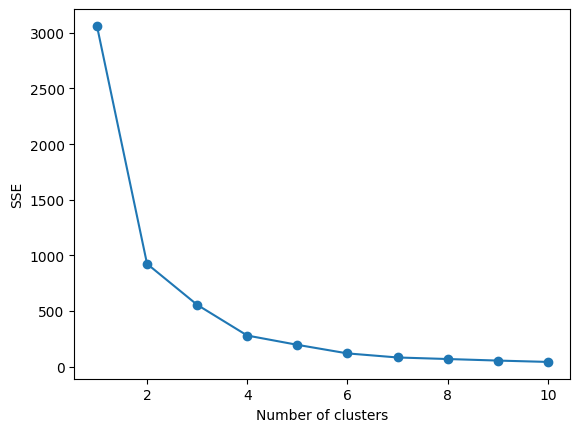

In [137]:
import matplotlib.pyplot as plt
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(dividend_yield_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [138]:
#concat으로 합치기
df2 = df.copy()

In [139]:
import unicodedata
def get_initial(consonant):
    # 유니코드 값을 이용하여 초성 추출
    cho_list = [chr(i) for i in range(0x1100, 0x1113)]
    char_code = ord(consonant)
    if 0xAC00 <= char_code <= 0xD7A3:
        initial_code = (char_code - 0xAC00) // 588
        return cho_list[initial_code]
    return consonant

# 회사명의 첫 글자를 가져오는 함수
def get_first_letter(company_name):
    first_char = company_name[0]
    if '가' <= first_char <= '힣':  # 한글 여부 판별
        return get_initial(first_char)
    return first_char

# 새로운 열 생성
df2['첫글자'] = df2['회사명'].apply(get_first_letter)

In [140]:
signal_column = df2.pop('cluster_dividend')
df2.insert(0, 'cluster_dividend', signal_column)
signal_column = df2.pop('종합등급')
df2.insert(0, '종합등급', signal_column)
signal_column = df2.pop('index')
df2.insert(0, 'index', signal_column)
signal_column = df2.pop('회사명')
df2.insert(0, '회사명', signal_column)
signal_column = df2.pop('첫글자')
df2.insert(0, '첫글자', signal_column)

In [141]:
df_index=df2.copy()

In [142]:
df_index

,첫글자,회사명,index,종합등급,cluster_dividend,stock_code,매출액,영업이익,당기순이익,부채비율,지배주주지분,유보율,배당수익률,ROA,ROE,매출액_상승률(퍼센트),영업이익_상승률,배당수익률_상승률,영업이익률_상승률,cluster_sales
0,ᄃ,동화약품,2019-12-01,B,4,20,0.001009,0.387533,0.305160,25.57,0.000944,982.04,1.44,0.616479,0.952249,0.002422,-93,0.00,0.000000,0
1,ᄃ,동화약품,2020-12-01,B,0,20,0.000893,0.387694,0.305405,26.59,0.001036,1094.99,0.92,0.634697,0.954146,0.002139,136,-0.52,5.401277,0
2,ᄃ,동화약품,2021-12-01,C,4,20,0.000962,0.387686,0.305291,24.34,0.001081,1149.13,1.23,0.624314,0.952952,0.002613,-7,0.31,-0.847096,0
3,ᄃ,동화약품,2022-12-01,C,4,20,0.001119,0.387774,0.305316,21.78,0.001132,1211.66,1.94,0.625529,0.953098,0.002823,74,0.71,1.104603,0
5,K,KR모터스,2019-12-01,C,0,40,0.000431,0.387126,0.304535,309.21,0.000130,-86.23,0.00,0.499373,0.915395,0.002422,-93,0.00,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3973,ᄒ,화승알앤에이,2022-12-01,B,4,378850,0.002170,0.387603,0.305205,356.04,0.000345,875.93,1.39,0.618829,0.956304,0.002422,-93,0.00,0.000000,0
3975,ᄏ,케이카,2022-12-01,B,3,381970,0.007197,0.388012,0.305426,117.38,0.000788,922.41,6.58,0.628859,0.954973,0.002422,-93,0.00,0.000000,0
3977,F,F&F,2022-12-01,B+,4,383220,0.005978,0.393646,0.310575,66.48,0.002746,24454.10,1.11,0.734877,0.970416,0.002422,-93,0.00,0.000000,0
3979,ᄋ,에코프로에이치엔,2022-12-01,B,4,383310,0.000715,0.387910,0.305451,112.85,0.000327,1076.96,1.32,0.687941,0.965021,0.002422,-93,0.00,0.000000,0


In [143]:
df2 = df2.drop(columns=['stock_code'])

In [144]:
df2

,첫글자,회사명,index,종합등급,cluster_dividend,매출액,영업이익,당기순이익,부채비율,지배주주지분,유보율,배당수익률,ROA,ROE,매출액_상승률(퍼센트),영업이익_상승률,배당수익률_상승률,영업이익률_상승률,cluster_sales
0,ᄃ,동화약품,2019-12-01,B,4,0.001009,0.387533,0.305160,25.57,0.000944,982.04,1.44,0.616479,0.952249,0.002422,-93,0.00,0.000000,0
1,ᄃ,동화약품,2020-12-01,B,0,0.000893,0.387694,0.305405,26.59,0.001036,1094.99,0.92,0.634697,0.954146,0.002139,136,-0.52,5.401277,0
2,ᄃ,동화약품,2021-12-01,C,4,0.000962,0.387686,0.305291,24.34,0.001081,1149.13,1.23,0.624314,0.952952,0.002613,-7,0.31,-0.847096,0
3,ᄃ,동화약품,2022-12-01,C,4,0.001119,0.387774,0.305316,21.78,0.001132,1211.66,1.94,0.625529,0.953098,0.002823,74,0.71,1.104603,0
5,K,KR모터스,2019-12-01,C,0,0.000431,0.387126,0.304535,309.21,0.000130,-86.23,0.00,0.499373,0.915395,0.002422,-93,0.00,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3973,ᄒ,화승알앤에이,2022-12-01,B,4,0.002170,0.387603,0.305205,356.04,0.000345,875.93,1.39,0.618829,0.956304,0.002422,-93,0.00,0.000000,0
3975,ᄏ,케이카,2022-12-01,B,3,0.007197,0.388012,0.305426,117.38,0.000788,922.41,6.58,0.628859,0.954973,0.002422,-93,0.00,0.000000,0
3977,F,F&F,2022-12-01,B+,4,0.005978,0.393646,0.310575,66.48,0.002746,24454.10,1.11,0.734877,0.970416,0.002422,-93,0.00,0.000000,0
3979,ᄋ,에코프로에이치엔,2022-12-01,B,4,0.000715,0.387910,0.305451,112.85,0.000327,1076.96,1.32,0.687941,0.965021,0.002422,-93,0.00,0.000000,0


In [145]:
#데이터 concat으로 합치기
df_concat = df2.copy()


In [146]:
df_concat

,첫글자,회사명,index,종합등급,cluster_dividend,매출액,영업이익,당기순이익,부채비율,지배주주지분,유보율,배당수익률,ROA,ROE,매출액_상승률(퍼센트),영업이익_상승률,배당수익률_상승률,영업이익률_상승률,cluster_sales
0,ᄃ,동화약품,2019-12-01,B,4,0.001009,0.387533,0.305160,25.57,0.000944,982.04,1.44,0.616479,0.952249,0.002422,-93,0.00,0.000000,0
1,ᄃ,동화약품,2020-12-01,B,0,0.000893,0.387694,0.305405,26.59,0.001036,1094.99,0.92,0.634697,0.954146,0.002139,136,-0.52,5.401277,0
2,ᄃ,동화약품,2021-12-01,C,4,0.000962,0.387686,0.305291,24.34,0.001081,1149.13,1.23,0.624314,0.952952,0.002613,-7,0.31,-0.847096,0
3,ᄃ,동화약품,2022-12-01,C,4,0.001119,0.387774,0.305316,21.78,0.001132,1211.66,1.94,0.625529,0.953098,0.002823,74,0.71,1.104603,0
5,K,KR모터스,2019-12-01,C,0,0.000431,0.387126,0.304535,309.21,0.000130,-86.23,0.00,0.499373,0.915395,0.002422,-93,0.00,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3973,ᄒ,화승알앤에이,2022-12-01,B,4,0.002170,0.387603,0.305205,356.04,0.000345,875.93,1.39,0.618829,0.956304,0.002422,-93,0.00,0.000000,0
3975,ᄏ,케이카,2022-12-01,B,3,0.007197,0.388012,0.305426,117.38,0.000788,922.41,6.58,0.628859,0.954973,0.002422,-93,0.00,0.000000,0
3977,F,F&F,2022-12-01,B+,4,0.005978,0.393646,0.310575,66.48,0.002746,24454.10,1.11,0.734877,0.970416,0.002422,-93,0.00,0.000000,0
3979,ᄋ,에코프로에이치엔,2022-12-01,B,4,0.000715,0.387910,0.305451,112.85,0.000327,1076.96,1.32,0.687941,0.965021,0.002422,-93,0.00,0.000000,0


In [147]:
df_concat.종합등급.unique()

array(['B', 'C', 'D', 'B+', 'A', 'A+', '.C'], dtype=object)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54633 (\N{HANGUL SYLLABLE HAB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46321 (\N{HANGUL SYLLABLE DEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44553 (\N{HANGUL SYLLABLE GEUB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


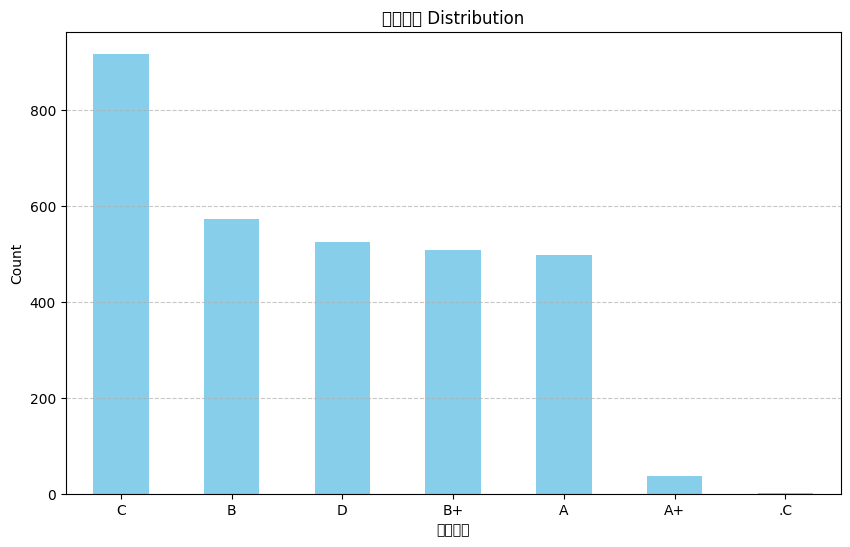

In [148]:
grade_counts = df_concat['종합등급'].value_counts()

# Plotting the counts of each grade
plt.figure(figsize=(10, 6))
grade_counts.plot(kind='bar', color='skyblue')
plt.title('종합등급 Distribution')
plt.xlabel('종합등급')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [149]:
"""
def convert_grade(grade):
    if grade in ['A+']:
        return 5
    if grade in ['A']:
        return 4
    if grade in ['B+']:
        return 3
    if grade in ['B']:
        return 2
    if grade in ['C','.C']:
        return 1
    if grade in ['D']:
        return 0

# apply 메서드와 lambda 함수를 사용하여 종합등급컬럼 생성
df_concat['종합등급'] = df_concat['종합등급'].apply(lambda x: convert_grade(x))
"""

"\ndef convert_grade(grade):\n    if grade in ['A+']:\n        return 5\n    if grade in ['A']:\n        return 4\n    if grade in ['B+']:\n        return 3\n    if grade in ['B']:\n        return 2\n    if grade in ['C','.C']:\n        return 1\n    if grade in ['D']:\n        return 0\n\n# apply 메서드와 lambda 함수를 사용하여 종합등급컬럼 생성\ndf_concat['종합등급'] = df_concat['종합등급'].apply(lambda x: convert_grade(x))\n"

In [150]:

def convert_grade(grade):
    if grade in ['B+', 'A+', 'A']:
        return 1
    else:
        return 0

# apply 메서드와 lambda 함수를 사용하여 종합등급컬럼 생성
df_concat['종합등급'] = df_concat['종합등급'].apply(lambda x: convert_grade(x))

In [151]:
split_date = pd.to_datetime('2022-12-01')
train_data = df_concat[df_concat['index'] < split_date]
test_data = df_concat[df_concat['index'] >= split_date]

In [152]:
train_data

,첫글자,회사명,index,종합등급,cluster_dividend,매출액,영업이익,당기순이익,부채비율,지배주주지분,유보율,배당수익률,ROA,ROE,매출액_상승률(퍼센트),영업이익_상승률,배당수익률_상승률,영업이익률_상승률,cluster_sales
0,ᄃ,동화약품,2019-12-01,0,4,0.001009,0.387533,0.305160,25.57,0.000944,982.04,1.44,0.616479,0.952249,0.002422,-93,0.00,0.000000,0
1,ᄃ,동화약품,2020-12-01,0,0,0.000893,0.387694,0.305405,26.59,0.001036,1094.99,0.92,0.634697,0.954146,0.002139,136,-0.52,5.401277,0
2,ᄃ,동화약품,2021-12-01,0,4,0.000962,0.387686,0.305291,24.34,0.001081,1149.13,1.23,0.624314,0.952952,0.002613,-7,0.31,-0.847096,0
5,K,KR모터스,2019-12-01,0,0,0.000431,0.387126,0.304535,309.21,0.000130,-86.23,0.00,0.499373,0.915395,0.002422,-93,0.00,0.000000,0
6,K,KR모터스,2020-12-01,0,0,0.000382,0.387433,0.304903,212.72,0.000181,-35.01,0.00,0.576908,0.941893,0.002146,259,0.00,19.646127,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941,ᄀ,교촌에프앤비,2021-12-01,0,4,0.001672,0.387905,0.305420,41.67,0.000597,1329.43,1.81,0.655226,0.956956,0.002422,-93,0.00,0.000000,0
3944,ᄏ,케이씨씨글라스,2021-12-01,1,1,0.003883,0.389323,0.306510,35.26,0.004098,8600.59,4.01,0.632464,0.954026,0.002422,-93,0.00,0.000000,0
3951,ᄒ,하이브,2021-12-01,0,0,0.004148,0.389676,0.306805,63.82,0.008222,13499.52,0.00,0.623492,0.953446,0.002422,-93,0.00,0.000000,0
3954,ᄃ,대덕전자,2021-12-01,1,4,0.003304,0.388279,0.305833,38.00,0.002051,2547.45,1.20,0.635128,0.954308,0.002422,-93,0.00,0.000000,0


In [153]:
columns_list = df_concat.columns[4:].tolist()

In [154]:
#train_data에서 종합등급컬럼을 제거한 것을 반환 하는 코드
train_data_x = train_data[columns_list]
train_data_y=train_data['종합등급']

In [155]:
train_data

,첫글자,회사명,index,종합등급,cluster_dividend,매출액,영업이익,당기순이익,부채비율,지배주주지분,유보율,배당수익률,ROA,ROE,매출액_상승률(퍼센트),영업이익_상승률,배당수익률_상승률,영업이익률_상승률,cluster_sales
0,ᄃ,동화약품,2019-12-01,0,4,0.001009,0.387533,0.305160,25.57,0.000944,982.04,1.44,0.616479,0.952249,0.002422,-93,0.00,0.000000,0
1,ᄃ,동화약품,2020-12-01,0,0,0.000893,0.387694,0.305405,26.59,0.001036,1094.99,0.92,0.634697,0.954146,0.002139,136,-0.52,5.401277,0
2,ᄃ,동화약품,2021-12-01,0,4,0.000962,0.387686,0.305291,24.34,0.001081,1149.13,1.23,0.624314,0.952952,0.002613,-7,0.31,-0.847096,0
5,K,KR모터스,2019-12-01,0,0,0.000431,0.387126,0.304535,309.21,0.000130,-86.23,0.00,0.499373,0.915395,0.002422,-93,0.00,0.000000,0
6,K,KR모터스,2020-12-01,0,0,0.000382,0.387433,0.304903,212.72,0.000181,-35.01,0.00,0.576908,0.941893,0.002146,259,0.00,19.646127,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941,ᄀ,교촌에프앤비,2021-12-01,0,4,0.001672,0.387905,0.305420,41.67,0.000597,1329.43,1.81,0.655226,0.956956,0.002422,-93,0.00,0.000000,0
3944,ᄏ,케이씨씨글라스,2021-12-01,1,1,0.003883,0.389323,0.306510,35.26,0.004098,8600.59,4.01,0.632464,0.954026,0.002422,-93,0.00,0.000000,0
3951,ᄒ,하이브,2021-12-01,0,0,0.004148,0.389676,0.306805,63.82,0.008222,13499.52,0.00,0.623492,0.953446,0.002422,-93,0.00,0.000000,0
3954,ᄃ,대덕전자,2021-12-01,1,4,0.003304,0.388279,0.305833,38.00,0.002051,2547.45,1.20,0.635128,0.954308,0.002422,-93,0.00,0.000000,0


In [156]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(train_data_x,train_data_y)

In [157]:
X_train_resampled

,cluster_dividend,매출액,영업이익,당기순이익,부채비율,지배주주지분,유보율,배당수익률,ROA,ROE,매출액_상승률(퍼센트),영업이익_상승률,배당수익률_상승률,영업이익률_상승률,cluster_sales
0,4,0.001009,0.387533,0.305160,25.570000,0.000944,982.040000,1.440000,0.616479,0.952249,0.002422,-93,0.000000,0.000000,0
1,0,0.000893,0.387694,0.305405,26.590000,0.001036,1094.990000,0.920000,0.634697,0.954146,0.002139,136,-0.520000,5.401277,0
2,4,0.000962,0.387686,0.305291,24.340000,0.001081,1149.130000,1.230000,0.624314,0.952952,0.002613,-7,0.310000,-0.847096,0
3,0,0.000431,0.387126,0.304535,309.210000,0.000130,-86.230000,0.000000,0.499373,0.915395,0.002422,-93,0.000000,0.000000,0
4,0,0.000382,0.387433,0.304903,212.720000,0.000181,-35.010000,0.000000,0.576908,0.941893,0.002146,259,0.000000,19.646127,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,0,0.008567,0.388429,0.305149,231.517743,0.002880,6607.126309,2.443193,0.605518,0.952472,0.002335,102,-0.289118,0.571290,0
2876,1,0.015258,0.392124,0.304892,48.541752,0.018039,11937.548305,0.796267,0.604712,0.951008,0.002352,334,0.004562,0.836354,0
2877,3,0.002086,0.387792,0.305324,57.489828,0.001182,456.964949,1.465304,0.623952,0.953534,0.002313,-29,-0.373724,-0.258838,0
2878,1,0.012838,0.392194,0.308027,59.631861,0.009559,7830.139268,3.271806,0.627611,0.953876,0.002422,-93,0.000000,0.000000,0


In [158]:
train_data.groupby('첫글자')['종합등급'].mean().reset_index()

,첫글자,종합등급
0,A,0.666667
1,B,0.666667
2,C,0.666667
3,D,0.285714
4,E,0.666667
5,F,0.333333
6,G,0.866667
7,H,0.666667
8,J,0.444444
9,K,0.186047


In [159]:
train_data['첫글자'].value_counts()

첫글자
ᄒ    354
ᄋ    311
ᄉ    282
ᄃ    247
ᄀ    113
ᄌ     94
ᄏ     88
S     82
ᄆ     56
H     54
ᄑ     50
ᄇ     49
ᄐ     49
L     48
K     43
ᄂ     42
ᄅ     35
D     21
C     18
ᄊ     17
G     15
ᄎ     12
N     11
B      9
T      9
J      9
ᄁ      6
A      6
P      5
F      3
O      3
E      3
M      3
W      3
Y      3
Name: count, dtype: int64

In [160]:

survival_rate = train_data.groupby('첫글자')['종합등급'].mean().reset_index()
survival_rate.columns = ['첫글자', '종합등급']

# 생존율이 0.5보다 크면 1, 작거나 같으면 0인 새로운 열 생성
survival_rate['종합등급_이진'] = survival_rate['종합등급'].apply(lambda x: 2 if x > 0.70 else (1 if x > 0.25 else 0))

# 결과를 원본 데이터프레임과 병합
df_concat = df_concat.merge(survival_rate[['첫글자', '종합등급_이진']], on='첫글자', how='left')


In [161]:
df_concat

,첫글자,회사명,index,종합등급,cluster_dividend,매출액,영업이익,당기순이익,부채비율,지배주주지분,유보율,배당수익률,ROA,ROE,매출액_상승률(퍼센트),영업이익_상승률,배당수익률_상승률,영업이익률_상승률,cluster_sales,종합등급_이진
0,ᄃ,동화약품,2019-12-01,0,4,0.001009,0.387533,0.305160,25.57,0.000944,982.04,1.44,0.616479,0.952249,0.002422,-93,0.00,0.000000,0,0.0
1,ᄃ,동화약품,2020-12-01,0,0,0.000893,0.387694,0.305405,26.59,0.001036,1094.99,0.92,0.634697,0.954146,0.002139,136,-0.52,5.401277,0,0.0
2,ᄃ,동화약품,2021-12-01,0,4,0.000962,0.387686,0.305291,24.34,0.001081,1149.13,1.23,0.624314,0.952952,0.002613,-7,0.31,-0.847096,0,0.0
3,ᄃ,동화약품,2022-12-01,0,4,0.001119,0.387774,0.305316,21.78,0.001132,1211.66,1.94,0.625529,0.953098,0.002823,74,0.71,1.104603,0,0.0
4,K,KR모터스,2019-12-01,0,0,0.000431,0.387126,0.304535,309.21,0.000130,-86.23,0.00,0.499373,0.915395,0.002422,-93,0.00,0.000000,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3057,ᄒ,화승알앤에이,2022-12-01,0,4,0.002170,0.387603,0.305205,356.04,0.000345,875.93,1.39,0.618829,0.956304,0.002422,-93,0.00,0.000000,0,1.0
3058,ᄏ,케이카,2022-12-01,0,3,0.007197,0.388012,0.305426,117.38,0.000788,922.41,6.58,0.628859,0.954973,0.002422,-93,0.00,0.000000,0,1.0
3059,F,F&F,2022-12-01,1,4,0.005978,0.393646,0.310575,66.48,0.002746,24454.10,1.11,0.734877,0.970416,0.002422,-93,0.00,0.000000,0,1.0
3060,ᄋ,에코프로에이치엔,2022-12-01,0,4,0.000715,0.387910,0.305451,112.85,0.000327,1076.96,1.32,0.687941,0.965021,0.002422,-93,0.00,0.000000,0,0.0


In [162]:
df_concat=df_concat.drop(columns=['첫글자'])


In [163]:
#df에 회사명컬럼제거
df_concat=df_concat.drop(columns=['회사명'])

In [164]:
df_concat

,index,종합등급,cluster_dividend,매출액,영업이익,당기순이익,부채비율,지배주주지분,유보율,배당수익률,ROA,ROE,매출액_상승률(퍼센트),영업이익_상승률,배당수익률_상승률,영업이익률_상승률,cluster_sales,종합등급_이진
0,2019-12-01,0,4,0.001009,0.387533,0.305160,25.57,0.000944,982.04,1.44,0.616479,0.952249,0.002422,-93,0.00,0.000000,0,0.0
1,2020-12-01,0,0,0.000893,0.387694,0.305405,26.59,0.001036,1094.99,0.92,0.634697,0.954146,0.002139,136,-0.52,5.401277,0,0.0
2,2021-12-01,0,4,0.000962,0.387686,0.305291,24.34,0.001081,1149.13,1.23,0.624314,0.952952,0.002613,-7,0.31,-0.847096,0,0.0
3,2022-12-01,0,4,0.001119,0.387774,0.305316,21.78,0.001132,1211.66,1.94,0.625529,0.953098,0.002823,74,0.71,1.104603,0,0.0
4,2019-12-01,0,0,0.000431,0.387126,0.304535,309.21,0.000130,-86.23,0.00,0.499373,0.915395,0.002422,-93,0.00,0.000000,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3057,2022-12-01,0,4,0.002170,0.387603,0.305205,356.04,0.000345,875.93,1.39,0.618829,0.956304,0.002422,-93,0.00,0.000000,0,1.0
3058,2022-12-01,0,3,0.007197,0.388012,0.305426,117.38,0.000788,922.41,6.58,0.628859,0.954973,0.002422,-93,0.00,0.000000,0,1.0
3059,2022-12-01,1,4,0.005978,0.393646,0.310575,66.48,0.002746,24454.10,1.11,0.734877,0.970416,0.002422,-93,0.00,0.000000,0,1.0
3060,2022-12-01,0,4,0.000715,0.387910,0.305451,112.85,0.000327,1076.96,1.32,0.687941,0.965021,0.002422,-93,0.00,0.000000,0,0.0


In [165]:
columns_list = df_concat.columns[2:].tolist()

In [166]:
len(columns_list)

16

In [167]:
split_date = pd.to_datetime('2022-12-01')
train_data = df_concat[df_concat['index'] < split_date]
test_data = df_concat[df_concat['index'] >= split_date]

In [168]:
#test_data에서 종합이진등급으로 널값인 행 제거
test_data = test_data.dropna(subset=['종합등급_이진'])

In [169]:
test_data.isnull().sum()

index               0
종합등급                0
cluster_dividend    0
매출액                 0
영업이익                0
당기순이익               0
부채비율                0
지배주주지분              0
유보율                 0
배당수익률               0
ROA                 0
ROE                 0
매출액_상승률(퍼센트)        0
영업이익_상승률            0
배당수익률_상승률           0
영업이익률_상승률           0
cluster_sales       0
종합등급_이진             0
dtype: int64

In [170]:
pip install catboost

In [179]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import svm
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
# 예측값과 실제값을 사용하여 F1 스코어 계산

xgb_classifier = xgb.XGBClassifier(seed=41)
# train_data와 test_data에서 X와 y를 설정합니다.
X_train_cat = train_data[columns_list].astype(float)
y_train_cat = train_data['종합등급'].astype(int)

X_test_cat = test_data[columns_list].astype(float)
y_test_cat = test_data['종합등급'].astype(int)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# 8개의 모델을 정의합니다.
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, random_state=41),
    "Random Forest Classifier": RandomForestClassifier(random_state=41),
    "KNN": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(random_state=41),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=41),
    "Decision Tree Classifer": DecisionTreeClassifier(random_state=41),
    "Bagging": BaggingClassifier(random_state=41),
    "extraTreesClassifier":ExtraTreesClassifier(n_estimators=100, random_state=41),
    "hist":HistGradientBoostingClassifier(random_state=41),
   # "svr":SVR(),
    "XGBClassifier Classifier": xgb.XGBClassifier(seed=41),
    'LGBM':LGBMClassifier(n_estimators=100,random_state=41,verbose=0),
    'catbost':CatBoostClassifier(random_state=41,verbose=0),


}
lst=[]
# 각 모델의 정확도를 출력합니다.
for name, model in models.items():
    kfold = KFold(n_splits=5, shuffle=True, random_state=41)

    lst_accuracy=[]
    lst_f1=[]
    lst_recall=[]

    for train_index, val_index in kfold.split(X_train_cat, y_train_cat):
        X_train_fold, X_val_fold = X_train_cat.iloc[train_index], X_train_cat.iloc[val_index]
        y_train_fold, y_val_fold = y_train_cat.iloc[train_index], y_train_cat.iloc[val_index]

        # X_val_fold, y_val_fold를 검증 데이터셋으로 사용하여 모델을 평가
        model.fit(X_train_fold, y_train_fold)
        y_pred_fold = model.predict(X_val_fold)
        accuracy_fold = accuracy_score(y_val_fold, y_pred_fold)
        lst_accuracy.append(accuracy_fold)
        lst_f1.append(f1_score(y_val_fold, y_pred_fold, average='macro'))
        lst_recall.append(recall_score(y_val_fold, y_pred_fold, average='macro'))

      # 평균 정확도, F1 점수, Recall 점수 계산


    mean_f1 = np.mean(lst_f1)
    mean_recall = np.mean(lst_recall)
    mean_accuracy = np.mean(lst_accuracy)
    lst.append(mean_accuracy)
   # 커스텀 정확도 계산
    print("{} Mean Cross-Validation Accuracy Score: {} f1score:{} recall{}: ".format(name, mean_accuracy,mean_f1,mean_recall ))

Logistic Regression Mean Cross-Validation Accuracy Score: 0.7069065990395511 f1score:0.5877475937804542 recall0.593169032432808: 
Random Forest Classifier Mean Cross-Validation Accuracy Score: 0.8216467922084929 f1score:0.792584715564573 recall0.7851940804213324: 
KNN Mean Cross-Validation Accuracy Score: 0.6962391409917446 f1score:0.6295721963979205 recall0.6248168542060832: 
Support Vector Classifier Mean Cross-Validation Accuracy Score: 0.6980963686397238 f1score:0.49977741170703505 recall0.5480268742817106: 
Naive Bayes Mean Cross-Validation Accuracy Score: 0.6934570765661252 f1score:0.5166514084713608 recall0.552757267288907: 
Gradient Boosting Mean Cross-Validation Accuracy Score: 0.8146678897102466 f1score:0.7843574701798086 recall0.7768043903770153: 
Decision Tree Classifer Mean Cross-Validation Accuracy Score: 0.7561528085037501 f1score:0.7255345343841453 recall0.7269220649114688: 
Bagging Mean Cross-Validation Accuracy Score: 0.8142221982409754 f1score:0.7809484850334314 reca

In [178]:
mean = sum(lst) / len(lst)

print("평균:", mean)

평균: 0.8207165596503534


In [ ]:
mean = sum(lst) / len(lst)

print("평균:", mean)

평균: 0.8179437706725469


In [180]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import svm
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
xgb_classifier = xgb.XGBClassifier(seed=41)
# train_data와 test_data에서 X와 y를 설정합니다.
X_train_cat = train_data[columns_list].astype(float)
y_train_cat = train_data['종합등급'].astype(int)

X_test_cat = test_data[columns_list].astype(float)
y_test_cat = test_data['종합등급'].astype(int)

params = {'iterations': [500],
          'depth': [4, 5, 6],
          'loss_function': ['Logloss', 'CrossEntropy'],
          'l2_leaf_reg': np.logspace(-20, -19, 3),
          'leaf_estimation_iterations': [10],
#           'eval_metric': ['Accuracy'],
#           'use_best_model': ['True'],
          'logging_level':['Silent'],
          'random_seed': [42]
         }

# 8개의 모델을 정의합니다.
models = {
    'catbost':CatBoostClassifier()
}
lst=[]
# 각 모델의 정확도를 출력합니다.
for name, model in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=params, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)
    grid_search .fit(X_train_cat, y_train_cat)
    y_pred = grid_search.predict(X_test_cat)
    lst.append(y_pred)
    accuracy = np.mean(y_pred == y_test_cat)
    # 커스텀 정확도 계산
    print("{} Mean Cross-Validation Accuracy Score: {}".format(name, accuracy))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
catbost Mean Cross-Validation Accuracy Score: 0.8114663726571113


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import svm
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
param_grid = {
    'n_estimators': [100],
    'max_depth': [None,40],
    'min_samples_split': [2,4],
    'min_samples_leaf': [1,2],  # 추가: 리프 노드의 최소 샘플 수
    'max_features': ['auto', 'sqrt'],  # 추가: 최대 특성 사용 옵션
    'bootstrap': [True]  # 추가: 부트스트랩 사용 여부

}

# 8개의 모델을 정의합니다.
models = {
   # "extraTreesClassifier":ExtraTreesClassifier(),
    "Random Forest Classifier": RandomForestClassifier(random_state=41)
}
lst=[]
# 각 모델의 정확도를 출력합니다.
for name, model in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
    grid_search .fit(X_train_cat, y_train_cat)
    y_pred = grid_search.predict(X_test_cat)
    lst.append(y_pred)
    accuracy = np.mean(y_pred == y_test_cat)
    # 커스텀 정확도 계산
    print("Best parameters found: ", grid_search.best_params_)
    print("Best score found: ", grid_search.best_score_)
    print("{} Mean Cross-Validation Accuracy Score: {}".format(name, accuracy))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters found:  {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best score found:  -0.18813144121297148
Random Forest Classifier Mean Cross-Validation Accuracy Score: 0.824696802646086


In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import randint
import numpy as np

# GridSearch를 위한 매개변수 분포 설정
param_dist = {
    'n_estimators': [100],  # 50에서 200 사이의 정수값
    'max_depth': [None ,40],    # None 또는 10, 20, 40
    'min_samples_split': [2,4 ],  # 2에서 10 사이의 정수값
    'min_samples_leaf': randint(1, 5),    # 1에서 4 사이의 정수값
    'max_features': ['auto', 'sqrt'],     # auto 또는 sqrt
    'bootstrap': [True, False]            # True 또는 False
}

# RandomForestClassifier와 ExtraTreesClassifier를 포함한 모델 정의
models = {
    "Random Forest Classifier": RandomForestClassifier(random_state=41),
    "Extra Trees Classifier": ExtraTreesClassifier(random_state=41)
}

# 각 모델에 대해 RandomizedSearchCV를 사용하여 최적의 매개변수 탐색
for name, model in models.items():
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=50,
                                       scoring='neg_mean_squared_error', cv=4, verbose=2, n_jobs=-1, random_state=42)
    random_search.fit(X_train_cat, y_train_cat)
    y_pred = random_search.predict(X_test_cat)

    accuracy = accuracy_score(y_test_cat, y_pred)
    print("Best parameters found: ", random_search.best_params_)
    print("Best score found: ", random_search.best_score_)
    print("{} Accuracy Score: {}".format(name, accuracy))

Fitting 4 folds for each of 50 candidates, totalling 200 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters found:  {'bootstrap': True, 'max_depth': 40, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}
Best score found:  -0.18624949134773883
Random Forest Classifier Accuracy Score: 0.8269018743109151
Fitting 4 folds for each of 50 candidates, totalling 200 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters found:  {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}
Best score found:  -0.18950141732935144
Extra Trees Classifier Accuracy Score: 0.8302094818081588


In [ ]:
param_grid = {
    "random_state": [0,42],   # [0, 1, 2, 3, 4],
    "n_estimators": [200,250,320,340,360,380,400], # [320, 340, 360, 380, 400],
    "max_depth": [25, 30, 32, 34, 38, 45],      # [25, 30, 32, 34, 38, 45
    'max_features' : ['auto', 'squrt', 'log2'],
    'oob_score' : [True, False]
}

# 8개의 모델을 정의합니다.
models = {
   "extraTreesClassifier":ExtraTreesClassifier(),
   "Random Forest Classifier": RandomForestClassifier(random_state=41)
}
lst=[]
# 각 모델의 정확도를 출력합니다.
for name, model in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)
    grid_search .fit(X_train_cat, y_train_cat)
    y_pred = grid_search.predict(X_test_cat)
    lst.append(y_pred)
    accuracy = np.mean(y_pred == y_test_cat)
    # 커스텀 정확도 계산
    print("Best parameters found: ", grid_search.best_params_)
    print("Best score found: ", grid_search.best_score_)
    print("{} Mean Cross-Validation Accuracy Score: {}".format(name, accuracy))

In [ ]:
xgb_classifier = xgb.XGBClassifier(seed=41)
# train_data와 test_data에서 X와 y를 설정합니다.
X_train_cat = train_data[columns_list].astype(float)
y_train_cat = train_data['종합등급'].astype(int)

X_test_cat = test_data[columns_list].astype(float)
y_test_cat = test_data['종합등급'].astype(int)


# 8개의 모델을 정의합니다.
models = {

    "extraTreesClassifier":ExtraTreesClassifier(n_estimators=100, random_state=42),

}
lst=[]
# 각 모델의 정확도를 출력합니다.
for name, model in models.items():

    model.fit(X_train_cat, y_train_cat)
    y_pred = model.predict(X_test_cat)
    lst.append(y_pred)
    accuracy = np.mean(y_pred == y_test_cat)
    # 커스텀 정확도 계산
    print("{} Mean Cross-Validation Accuracy Score: {}".format(name, accuracy))

extraTreesClassifier Mean Cross-Validation Accuracy Score: 0.8371837183718371


In [ ]:
feature_importances=model.feature_importances_
for i in range(len(feature_importances)):
    print(f"{columns_list[i]}: {feature_importances[i]}")


cluster_dividend: 0.028642932199257252
매출액: 0.16304494996144026
영업이익: 0.09471127544459744
당기순이익: 0.07226582432077772
부채비율: 0.05633261799636054
지배주주지분: 0.1449434107186782
유보율: 0.06202492008008673
배당수익률: 0.04733705230655918
ROA: 0.04550129680783264
ROE: 0.04391391864828592
매출액_상승률(퍼센트): 0.038518357165447624
영업이익_상승률: 0.055961517039078305
배당수익률_상승률: 0.03804271070490739
영업이익률_상승률: 0.03890231469710711
cluster_sales: 0.0037856498551405676
종합등급_이진: 0.0660712520544432


In [ ]:
y_train_cat.unique()

array([0, 1])

In [ ]:
model.feature_importances_

array([0.02864293, 0.16304495, 0.09471128, 0.07226582, 0.05633262,
       0.14494341, 0.06202492, 0.04733705, 0.0455013 , 0.04391392,
       0.03851836, 0.05596152, 0.03804271, 0.03890231, 0.00378565,
       0.06607125])

In [181]:
import tensorflow as tf
train_Y = tf.keras.utils.to_categorical(y_train_cat, num_classes=2)
test_Y = tf.keras.utils.to_categorical(y_test_cat, num_classes=2)
X_train_cat_np = X_train_cat.to_numpy()
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=51, activation='relu', input_shape=(X_train_cat_np.shape[1],)),
    tf.keras.layers.Dropout(0.2),
   # tf.keras.layers.Dense(units=40, activation='sigmoid'),

    tf.keras.layers.Dense(units=20, activation='swish'),
    tf.keras.layers.Dense(units=12, activation='sigmoid'),
    tf.keras.layers.Dense(units=2, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 51)                867       
                                                                 
 dropout (Dropout)           (None, 51)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                1040      
                                                                 
 dense_2 (Dense)             (None, 12)                252       
                                                                 
 dense_3 (Dense)             (None, 2)                 26        
                                                                 
Total params: 2185 (8.54 KB)
Trainable params: 2185 (8.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [183]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30),  # 검증 손실이 5 에포크 동안 개선되지 않으면 학습 중지
     # 에포크마다 학습률을 감소시키는 예시
]

In [184]:
train_Y = tf.keras.utils.to_categorical(y_train_cat, num_classes=2)
test_Y = tf.keras.utils.to_categorical(y_test_cat, num_classes=2)
X_train_cat_np = X_train_cat.to_numpy()
X_test_cat_np   =X_test_cat.to_numpy()
history = model.fit(X_train_cat_np, train_Y, epochs=400, batch_size=32, validation_split=0.25,callbacks=callbacks)

Epoch 1/400
51/51 [==============================] - 2s 13ms/step - loss: 0.6270 - accuracy: 0.6902 - val_loss: 0.7060 - val_accuracy: 0.5955
Epoch 2/400
51/51 [==============================] - 0s 4ms/step - loss: 0.6171 - accuracy: 0.6970 - val_loss: 0.7207 - val_accuracy: 0.5974
Epoch 3/400
51/51 [==============================] - 0s 4ms/step - loss: 0.6076 - accuracy: 0.7001 - val_loss: 0.6896 - val_accuracy: 0.5937
Epoch 4/400
51/51 [==============================] - 0s 4ms/step - loss: 0.6050 - accuracy: 0.7007 - val_loss: 0.6855 - val_accuracy: 0.5937
Epoch 5/400
51/51 [==============================] - 0s 3ms/step - loss: 0.6067 - accuracy: 0.7100 - val_loss: 0.7059 - val_accuracy: 0.5918
Epoch 6/400
51/51 [==============================] - 0s 4ms/step - loss: 0.6042 - accuracy: 0.7063 - val_loss: 0.7104 - val_accuracy: 0.5993
Epoch 7/400
51/51 [==============================] - 0s 4ms/step - loss: 0.6064 - accuracy: 0.7063 - val_loss: 0.6946 - val_accuracy: 0.6030
Epoch 8/400


In [185]:
model.evaluate(X_test_cat_np,test_Y)

29/29 [==============================] - 0s 2ms/step - loss: 0.6069 - accuracy: 0.6924


[0.6068593859672546, 0.6923925280570984]